**ML MID TERM PROJECT - TEAM 32**

Project Topic 6 (Hiring Decision)


> MS2024013 - Mahima

> MT2024146 - Shivani Sanjiv Shukla

> MT2024901 - Fitriana Prasari Dewi







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df= pd.read_csv('recruitment_data.csv')
df.head()
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [ ]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [ ]:
X_=df.drop("HiringDecision",axis=1) 0.8966666666666666
Y_=df["HiringDecision"]
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [ ]:
X_.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2


In [ ]:
Y_.head()

0    1
1    1
2    0
3    0
4    0
Name: HiringDecision, dtype: int64

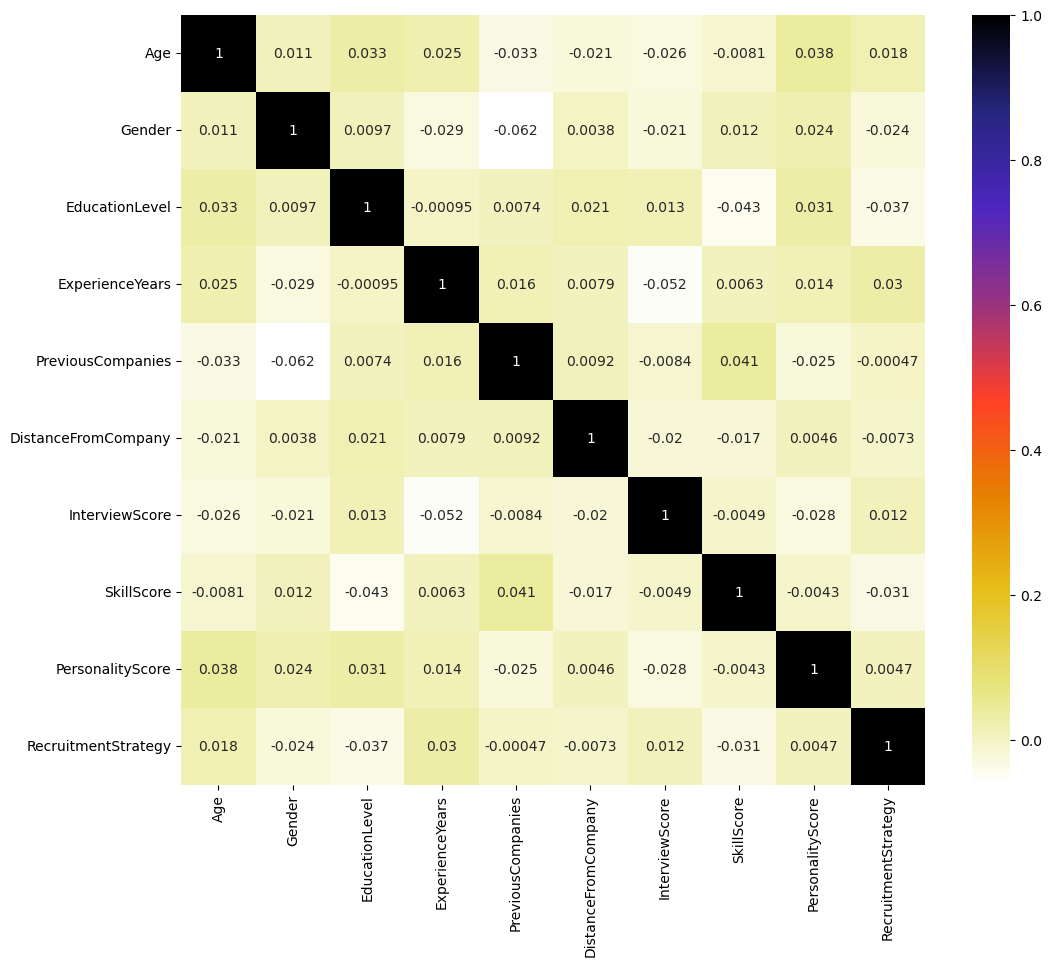

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_feature=correlation(X_,0.7)
len(set(corr_feature))

0

In [ ]:
def standardize_column(column):
    mean = np.mean(column)
    std_dev = np.std(column)
    return (column - mean) / std_dev

In [ ]:
df_standardized = df.copy()  # Make a copy of the original DataFrame
for column in df.columns:
    df_standardized[column] = standardize_column(df[column])
print("Original Data:")
print(df)
print("\nStandardized Data (Z-score normalization):")
print(df_standardized)

Original Data:
      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0               26.783828        

In [ ]:
def min_max_normalize_column(column):
    min_val = np.min(column)
    max_val = np.max(column)
    return (column - min_val) / (max_val - min_val)

# Apply Min-Max normalization to each feature column
df_min_max = df.copy()  # Make a copy of the original DataFrame
for column in df.columns:
    df_min_max[column] = min_max_normalize_column(df[column])

print("\nMin-Max Normalized Data (0-1 range):")
print(df_min_max)


Min-Max Normalized Data (0-1 range):
           Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0     0.200000     1.0        0.333333         0.000000               0.50   
1     0.633333     1.0        1.000000         0.800000               0.50   
2     0.933333     0.0        0.333333         0.200000               0.25   
3     0.466667     1.0        0.333333         0.333333               0.25   
4     0.333333     0.0        0.000000         0.400000               0.00   
...        ...     ...             ...              ...                ...   
1495  0.933333     0.0        0.333333         0.200000               0.75   
1496  0.233333     1.0        0.333333         0.666667               0.50   
1497  0.133333     1.0        0.000000         0.066667               0.25   
1498  0.933333     0.0        0.333333         0.266667               0.75   
1499  0.466667     1.0        0.333333         0.733333               1.00   

      DistanceFromCompany

In [ ]:
X = df_min_max.drop("HiringDecision",axis=1)
Y = df_min_max["HiringDecision"]
df_min_max.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0.200000,1.0,0.333333,0.000000,0.50,0.515450,0.48,0.78,0.91,0.0,1.0
1,0.633333,1.0,1.000000,0.800000,0.50,0.497013,0.35,0.68,0.80,0.5,1.0
2,0.933333,0.0,0.333333,0.200000,0.25,0.177927,0.20,0.67,0.13,0.5,0.0
3,0.466667,1.0,0.333333,0.333333,0.25,0.107611,0.36,0.27,0.70,1.0,0.0
4,0.333333,0.0,0.000000,0.400000,0.00,0.842135,0.23,0.52,0.85,0.5,0.0


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(1200, 10)
(1200,)


## Logistric Regression

In [ ]:
import numpy as np

# Sigmoid function (maps values between 0 and 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression model from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.iterations):
            # Linear model (z = wX + b)
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function to get predictions
            y_predicted = sigmoid(linear_model)

            # Compute gradients for weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Linear model (z = wX + b)
        linear_model = np.dot(X, self.weights) + self.bias
        # Apply sigmoid function
        y_predicted = sigmoid(linear_model)
        # Convert probabilities to binary classes (0 or 1)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

# Example usage
if __name__ == "__main__":
    # Create a dataset (replace with your actual data)
    x_train = X_train
    y_train = Y_train

    # Initialize the logistic regression model
    model = LogisticRegressionScratch(learning_rate=0.01, iterations=10000)
    # Train the model
    model.fit(x_train, y_train)
    # Make predictions
    predictions = model.predict(x_train)

    print("Predicted classes:", predictions)


Predicted classes: [1 1 0 ... 0 0 1]


## Decision trees

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=4):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
                       gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

## Training on Both models

In [ ]:
predictions = model.predict(X_test)
print(len(predictions))

300


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
class_report = classification_report(Y_test, predictions)
print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:  0.8666666666666667
Confusion Matrix:
 [[204  11]
 [ 29  56]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       215
         1.0       0.84      0.66      0.74        85

    accuracy                           0.87       300
   macro avg       0.86      0.80      0.82       300
weighted avg       0.86      0.87      0.86       300



In [ ]:
X = df_min_max.iloc[:, :-1].values
Y = df_min_max.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X, Y, test_size=.20, random_state=41)

In [ ]:
print(X_train_dt.shape)
print(Y_train_dt.shape)

(1200, 10)
(1200, 1)


In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=6)
classifier.fit(X_train_dt, Y_train_dt)
classifier.print_tree()

X_9 <= 0.0 ? 0.14172068580101083
 left:X_7 <= 0.47 ? 0.0673748031138045
  left:X_3 <= 0.3333333333333333 ? 0.10481356777653078
    left:X_6 <= 0.79 ? 0.10587154972181712
        left:X_8 <= 0.73 ? 0.048765112141546496
                left:X_8 <= 0.0 ? 0.05124653739612173
                                left:1.0
                                right:0.0
                right:X_2 <= 0.3333333333333333 ? 0.336620644312952
                                left:X_0 <= 0.16666666666666666 ? 0.19753086419753085
                                                                left:1.0
                                                                right:0.0
                                right:1.0
        right:X_2 <= 0.3333333333333333 ? 0.14814814814814814
                left:X_8 <= 0.59 ? 0.49382716049382713
                                left:0.0
                                right:1.0
                right:1.0
    right:X_2 <= 0.3333333333333333 ? 0.06311638043195417
        left:X_8 <

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction= classifier.predict(X_test_dt)
accuracy = accuracy_score(Y_test_dt, prediction)
conf_matrix = confusion_matrix(Y_test_dt, prediction)
class_report = classification_report(Y_test_dt,prediction)
print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:  0.8966666666666666
Confusion Matrix:
 [[192  16]
 [ 15  77]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       208
         1.0       0.83      0.84      0.83        92

    accuracy                           0.90       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.90      0.90      0.90       300



# Naive Bayes

In [ ]:
NUM_FEATURES = 10
NUM_CLASSES = 2
NUM_POINTS = 1500
METRIC = "gaussian"

In [ ]:
def plotDists(y) :
    return sns.countplot(x=y)

def acc(true, pred) :
    assert len(true)==len(pred), "Truth and Pred Lengths not same"
    true = np.array(true)
    pred = np.array(pred).astype(np.int32)
    return np.sum(true==pred)/len(true)

In [ ]:
class NaiveBayes :
    def __init__(self, x, y, metric="gaussian", use_log=False) :
        self.x = np.array(x)
        self.y = np.array(y)
        self.data = np.concatenate((self.x, self.y.reshape(-1, 1)), axis=1)
        self.n_features = self.x.shape[1]
        self.classes = set(y)
        self.n_classes = len(self.classes)
        assert metric in ["gaussian"], "Invalid metric"
        self.metric = metric
        self.use_log = use_log

    def fit(self) :
        self.summary = {}
        for i in self.classes :
            d = self.data[self.data[:,-1]==i]
            mean = np.mean(d, axis=0)[:-1]
            std = np.std(d, axis=0)[:-1]
            l = len(d)
            self.summary[i] = {
                "mean" : mean,
                "std" : std,
                "len" : l
            }

    def get_probability(self, inp, mean, std) :
        if self.metric=="gaussian" :
            exponent = np.exp(-(((inp-mean)**2)/(2*(std**2))))
            res = (1 / (np.sqrt(2 * np.pi) * std)) * exponent
            if self.use_log :
                return np.log(1+res)
            return res

    def predict(self, x) :
        assert self.summary, "Classifier not fit yet"
        results = []
        # Convert x to numerical type if it's a DataFrame
        if isinstance(x, pd.DataFrame):
            x = x.values.astype(np.float64)
        for inp in x :
            pred_class = -1
            pred_prob = 0
            for i in self.classes :
                probs = self.get_probability(inp, self.summary[i]["mean"], self.summary[i]["std"])
                class_prob = np.prod(probs)
                if class_prob > pred_prob :
                    pred_class = i
                    pred_prob = class_prob
            results.append(pred_class)
        return results

In [ ]:
x = df_min_max.drop("HiringDecision",axis=1)
y = df_min_max["HiringDecision"]
df_min_max.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0.200000,1.0,0.333333,0.000000,0.50,0.515450,0.48,0.78,0.91,0.0,1.0
1,0.633333,1.0,1.000000,0.800000,0.50,0.497013,0.35,0.68,0.80,0.5,1.0
2,0.933333,0.0,0.333333,0.200000,0.25,0.177927,0.20,0.67,0.13,0.5,0.0
3,0.466667,1.0,0.333333,0.333333,0.25,0.107611,0.36,0.27,0.70,1.0,0.0
4,0.333333,0.0,0.000000,0.400000,0.00,0.842135,0.23,0.52,0.85,0.5,0.0


<Axes: ylabel='count'>

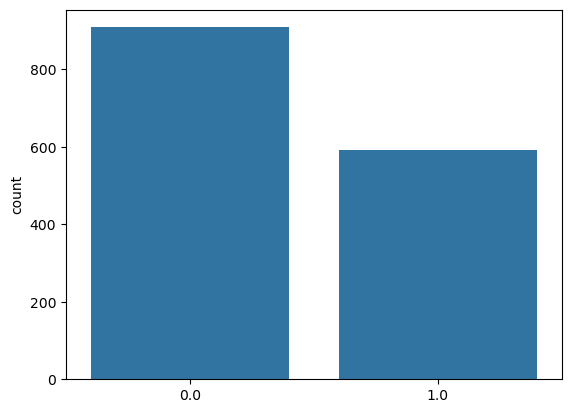

In [ ]:
nbg = NaiveBayes(x, y, METRIC)
nbg.fit()
acc(y, nbg.predict(x.values))
plotDists(nbg.predict(x))

<Axes: ylabel='count'>

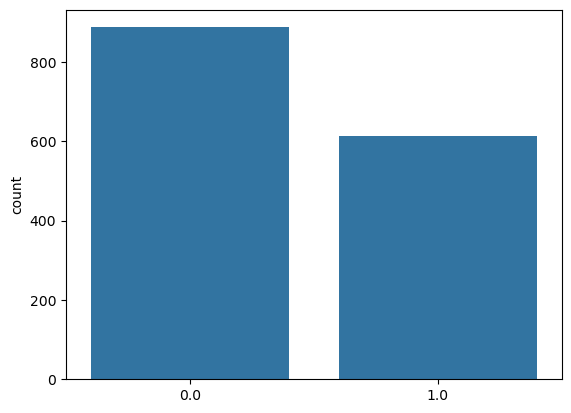

In [ ]:
nbgl = NaiveBayes(x, y, METRIC, use_log=True)
nbgl.fit()
acc(y, nbgl.predict(x))
plotDists(nbgl.predict(x))

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y' contains the true labels and 'nbg.predict(x)' contains the predicted labels
y_pred = nbg.predict(x)
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)

#Confusion Matrix
print("\nExplanation of the Confusion Matrix:")
print("True Positive (TP):", cm[1, 1], " - The model correctly predicted the positive class (HiringDecision = 1).")
print("True Negative (TN):", cm[0, 0], " - The model correctly predicted the negative class (HiringDecision = 0).")
print("False Positive (FP):", cm[0, 1], " - The model incorrectly predicted the positive class (HiringDecision = 1) when it was actually negative (HiringDecision = 0).")
print("False Negative (FN):", cm[1, 0], " - The model incorrectly predicted the negative class (HiringDecision = 0) when it was actually positive (HiringDecision = 1).")

# Additional analysis (optional)
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Confusion Matrix:
[[839 196]
 [ 69 396]]

Explanation of the Confusion Matrix:
True Positive (TP): 396  - The model correctly predicted the positive class (HiringDecision = 1).
True Negative (TN): 839  - The model correctly predicted the negative class (HiringDecision = 0).
False Positive (FP): 196  - The model incorrectly predicted the positive class (HiringDecision = 1) when it was actually negative (HiringDecision = 0).
False Negative (FN): 69  - The model incorrectly predicted the negative class (HiringDecision = 0) when it was actually positive (HiringDecision = 1).

Accuracy: 0.8233333333333334
Precision: 0.668918918918919
Recall: 0.8516129032258064
F1-Score: 0.7492904446546831


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y' contains the true labels and 'nbg.predict(x)' contains the predicted labels
y_pred = nbg.predict(x)
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)

#Confusion Matrix
print("\nExplanation of the Confusion Matrix:")
print("True Positive (TP):", cm[1, 1], " - The model correctly predicted the positive class (HiringDecision = 1).")
print("True Negative (TN):", cm[0, 0], " - The model correctly predicted the negative class (HiringDecision = 0).")
print("False Positive (FP):", cm[0, 1], " - The model incorrectly predicted the positive class (HiringDecision = 1) when it was actually negative (HiringDecision = 0).")
print("False Negative (FN):", cm[1, 0], " - The model incorrectly predicted the negative class (HiringDecision = 0) when it was actually positive (HiringDecision = 1).")

# Additional analysis (optional)
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Confusion Matrix:
[[839 196]
 [ 69 396]]

Explanation of the Confusion Matrix:
True Positive (TP): 396  - The model correctly predicted the positive class (HiringDecision = 1).
True Negative (TN): 839  - The model correctly predicted the negative class (HiringDecision = 0).
False Positive (FP): 196  - The model incorrectly predicted the positive class (HiringDecision = 1) when it was actually negative (HiringDecision = 0).
False Negative (FN): 69  - The model incorrectly predicted the negative class (HiringDecision = 0) when it was actually positive (HiringDecision = 1).

Accuracy: 0.8233333333333334
Precision: 0.668918918918919
Recall: 0.8516129032258064
F1-Score: 0.7492904446546831


In [11]:
# CONCLUSION:

# Comparative analysis of Logistic Regression, Decision Tree, and Naive Bayes for hiring prediction reveals that Decision Tree consistently
# outperforms the other models.
# Decision Tree achieved a notable accuracy of 89.6% compared to Logistic Regression's 86.7% and Naive Bayes' 82.3%.
# These findings strongly suggest that Decision Tree is the optimal choice for predicting hiring outcomes in this specific dataset